In [1]:
import pandas as pd

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import string

In [3]:
df=pd.read_csv('TwitterHate.csv')

In [4]:
df.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
df['tweet'].iloc[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [7]:
df['tweet'].iloc[14]

'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins'

In [8]:
## Retrieving all textual data
tweets = df.tweet.values

In [9]:
tweets

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1

In [11]:
encoded_docs = tokenizer.texts_to_sequences(tweets)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           1468480   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 1,485,131
Trainable params: 1,485,131
Non-trainable params: 0
_________________________________________________________________
None


2022-05-15 11:29:04.624505: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
history = model.fit(padded_sequence,df['label'],validation_split=0.2, epochs=5, batch_size=32)

2022-05-15 11:29:04.819494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
800/800 [==============================] - 122s 150ms/step - loss: 0.1999 - accuracy: 0.9404 - val_loss: 0.1318 - val_accuracy: 0.9531
Epoch 2/5
800/800 [==============================] - 124s 155ms/step - loss: 0.1115 - accuracy: 0.9613 - val_loss: 0.1185 - val_accuracy: 0.9581
Epoch 3/5
800/800 [==============================] - 136s 170ms/step - loss: 0.0953 - accuracy: 0.9675 - val_loss: 0.1239 - val_accuracy: 0.9600
Epoch 4/5
800/800 [==============================] - 143s 178ms/step - loss: 0.0819 - accuracy: 0.9706 - val_loss: 0.1238 - val_accuracy: 0.9611
Epoch 5/5
800/800 [==============================] - 151s 188ms/step - loss: 0.0756 - accuracy: 0.9729 - val_loss: 0.1183 - val_accuracy: 0.9589


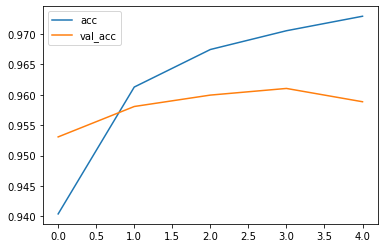

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

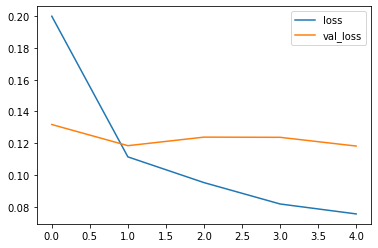

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [17]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", prediction)
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  0
Predicted label:  0
